# What sells a car?

As an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. We will study data collected over the last few years and determine which factors influence the price of a vehicle.


##  Introduction
This report identified potential factors that influence the price of a vehicle based on the free advertisement data collected over the last few years on Crankshaft List. 

###  Goal:
This report will test various factors that might influence car prices based on free advertisement data listed below:

1. Model Year
2. Model
3. Condition
4. Fuel Type
5. Condition
6. Odometer reading
7. Transmission
8. Paint color
9. Whether the car is four-wheel drive


### Stages:
This project will consist of the following stages:

1. Initialization
2. Data Preprocessing
    1. Missing Values
    2. Data Types
    3. Data Enrichment
    4. Clean Data
    
3. Exploratory Data Analysis
    1. Ads Lifetime
    2. Average Price
    3. Price Factors
    4. Core Parameters
    5. Outliers
    6. Core Parameters without Outliers
4. Conclusion
         



## Initialization

In [1]:
# Loading all the libraries

#importing pandas
import pandas as pd

#importing pyplot module
import matplotlib.pyplot as plt


### Load data

In [2]:
# Load the data file into a DataFrame

car = pd.read_csv('/datasets/vehicles_us.csv')


### Explore initial data

Reading the dataset and look at the general information.


In [3]:
#The general/summary information about the DataFrame

car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal


    

In [4]:
# print a sample of data

car.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


This dataset contains 13 columns and 51525 rows. 
Few issues are present: 
1. Missing values in:
    1. 'model_year'
    2. 'cylinders'
    3. 'odometer'
    4. 'paint_color'
    5. 'is_4wd'
    
Within all of the columns that contains missing values, 'is_4wd' appeared to contain the most missing values, followed by 'paint_color'.

2. Wrong data type in:
    1. 'date_posted'
    2. 'is_4wd'
    
'date_posted' needs to be date/time instead of object. While 'is_4wd' needs to be boolean instead of float64. 

These will be addressed in the following steps. 


### Conclusions and further steps


Based on the general infomation of the dataset, I have identified several issues. In the following steps, I will replace the missing values in the columns 'model_year', 'cylinders', 'odometer', 'paint_color', and 'is_4wd'. The correct data type will be assigned to 'is_4wd' and 'date_posted'. 

# Data Preprocessing

## Treat missing values 



The following columns contain missing values: 'model_year', 'cylinders', 'odometer', 'paint_color' and 'is_4wd'. We will deal with the first four columns, and save 'is_4wd' for later steps. 

We will first deal with **model_year** column. Since it is a numerical column, we will use .describe() to get some basic information.

The reason why I chose to work with 'model_year' first is that other columns with missing values, such as odometer will likely need this information to fill the missing values. 

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64


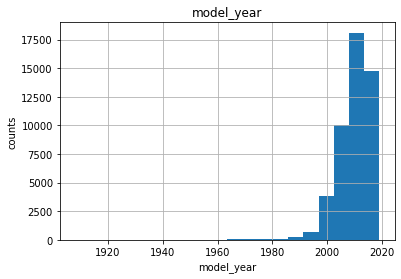

In [5]:
#check description of this column

print(car['model_year'].describe())
car['model_year'].hist(bins = 20)
plt.title('model_year')
plt.xlabel('model_year')
plt.ylabel('counts')
plt.show()

The standard deviation appeared to be 6 years, although the mean and median are not too different. The distribution appeared to be skewed, therefore we should use the median to fill our missing values.  

Generally speaking, the model year can be inferred base on the model and condition. We could also use the odometer reading but since we have decided to use model-year for odometer missing values, we should fill model year first.  

In [6]:
#group data by 'model' and 'condition', and calculate the median 'model_year'

model_year_med = car.groupby(['model', 'condition'])['model_year'].median()

#Create a function that takes 'row' as argument

def fill_mod_yr(row):
    
    #if the value for model_year is missing
    
    if pd.isna(row['model_year']):
        
        #returns the median model_year value based on model and condition from model_year_med
        
        return model_year_med.get((row['model'], row['condition']))
    
    #if the value is not missing, then return the existing model_year value
    else:
        return row['model_year']
    

#applying the function to the model_year column

car['model_year'] = car.apply(fill_mod_yr, axis =1)

#checking to make sure the function has applied properly

car.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2008.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [7]:
#making sure all missing values in 'model_year' have been filled

car['model_year'].isna().sum()

6

It appeared that there are still 6 missing values, it is likely that since we are using the median value based on the grouping, the group only contains one value, therefore it cannot fill the missing value with the median of one value. However, we can fill those manually by using the median.  

In [8]:
#fill remaining missing values manually

car['model_year'] = car['model_year'].fillna(car['model_year'].median())

In [9]:
#making sure all missing values have been filled
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


All missing values have been filled. 

Filling missing values in **odometer** column

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64


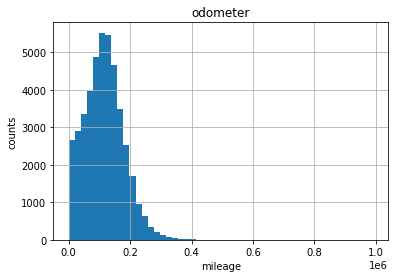

In [10]:
#check description of this column

print(car['odometer'].describe())
car['odometer'].hist(bins = 50)
plt.title('odometer')
plt.xlabel('mileage')
plt.ylabel('counts')
plt.show()

The standard deviation appeared to be quite high (65094 miles), and the distribution appeared to be skewed, which push us towards filling missing values with the median. However, there is likely an association between the odometer reading, model year and the condition of the car. So we will take into consideration of the model year and the condition by grouping the data by these two columns and calculate the median mileage of each combination. And we have filled all missing values in model_year.


In [11]:
#group data by 'model_year' and 'conditions', and calculate the median odometer based on the grouping

mile = car.groupby(['model_year', 'condition'])['odometer'].median()


#Create a function that takes 'row' as argument

def fill_odo(row):
    
    #if there is a missing value in odometer
    if pd.isna(row['odometer']):
        
        #return the median mileage based on model year and condition
        
        return mile.get((row['model_year'], row['condition']))
    
    #if no missing value, return the original odometer value
    
    else:
        return row['odometer']
    
#applying the function to the column

car['odometer'] = car.apply(fill_odo, axis =1)

#check to see the function has applied correctly

car.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2008.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,188000.0,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [12]:
#check to see if there is any missing values left over

car['odometer'].isna().sum()

7

There are 7 missing values left over, could be due to the same reason listed above. Will fill these manually. 

In [13]:
#fill remaining missing values manually

car['odometer'] = car['odometer'].fillna(car['odometer'].median())

In [14]:
#To verify

car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


All missing values have been filled in 'odometer'.

Fill missing values in **cylinders** column.

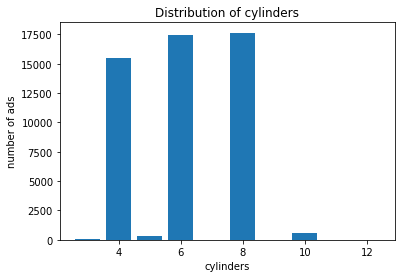

In [66]:
#stats on this column

cylinders_df = (
    car['cylinders']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'cylinders', 'cylinders': 'count'})
    .sort_values(by='cylinders')
)

plt.bar(cylinders_df['cylinders'], cylinders_df['count'])

plt.xlabel('cylinders')
plt.ylabel('number of ads')
plt.title('Distribution of cylinders')

plt.show()

There is no huge difference between the mean and the median, we will stick with median based on the distribution. Cylinders, like other columns with missing values, have association with other columns. This time it is 'model' and 'model_year'. So we will write a function that is similar to the ones that we used to fill other missing values. 

In [16]:
#group data by 'model_year' and 'model', and calculate the median cylinders based on the grouping

cyns = car.groupby(['model_year', 'model'])['cylinders'].median()


#Create a function that takes 'row' as argument

def fill_cyn(row):
    
    #if there is a missing value in cylinders
    if pd.isna(row['cylinders']):
        
        #return the median cylinders based on model year and model
        
        return cyns.get((row['model_year'], row['model']))
    
    #if no missing value, return the original cylinders value
    
    else:
        return row['cylinders']
    
#applying the function to the column

car['cylinders'] = car.apply(fill_cyn, axis =1)

#check if missing values have been filled

car.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2008.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,188000.0,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [17]:
#as always, check to see if there are missing values

car['cylinders'].isna().sum()

29

There are 29 missing values left over, could be due to the same reason listed above (only one value for a specific group). Will fill these manually. 

In [18]:
#fill remaining missing values manually

car['cylinders'] = car['cylinders'].fillna(car['cylinders'].median())

In [19]:
#To verify

car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


All missing values have been filled!

**The 'paint_color' column**

In [20]:
car['paint_color'].isna().sum() / len(car) *100

17.985443959243085

This column appeared to be categorical, and no reference data available to fill the missing data in this column. 

By deleting all NaN in this column, we will lose 18% of the data (that includes other complete information where the only value missing is the paint color). The deletion of those rows could potentially skew the results of our exploratory data analysis. 

Therefore, I think it is best that we save those rows with NaN values. 

## Fix data types

The column **'date_posted'** contains object type values, where it should contain date/time type.

The format of the date are written in yyyy-mm-dd, therefore, changes will be made accordingly.

In [21]:
#change the datetype from object to date/time

car['date_posted'] = pd.to_datetime(car['date_posted'], format = '%Y-%m-%d')

car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        25572 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


The column **'is_4wd'** contains float64 type values, where it should contain boolean values (True or False), since the column is asking whether the car has four-wheel drive.
This column also contains missing values, we will address it here as well. 

In [22]:
#start by checking the unique values in this column

car['is_4wd'].unique()

array([ 1., nan])

The unique values are 1 and NaN. Since this column is tell us whether a specific car has four-wheel drive. We can assume that 1 means this car has four-wheel drive, so a "True" value should be assigned. While NaN will likely refer to 0 or a 'False' value. 

First we will fill NaN with the value '0', then the column will be converted to a boolean column. Where 1 = True, and 0 = False.

In [23]:
#inputs 0 in the column where the value does not equal to 1.

car['is_4wd'] = car['is_4wd'].where(car['is_4wd'] == 1, 0)

#making a boolean column 

car['has_4wd'] = car['is_4wd'] == 1

#checking to see 'has_4wd contains proper boolean values'

car.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,has_4wd
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,True
1,25500,2008.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,True
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,False
3,1500,2003.0,ford f-150,fair,8.0,gas,188000.0,automatic,pickup,NaN,0.0,2019-03-22,9,False
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,False
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,True
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,False
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,True
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,True
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,True


'is_4wd' can also be changed to a boolean column directly by using .astype('bool') since all of the missing values have been filled with 0. However, I have created a new column to store the current information in case more changes need to be made further down the analysis.

So far, all missing values have been filled, and although data type has not been changed for 'is_4wd', a new column 'has_4wd' contains boolean values that is based on 'is_4wd'.

**Conclusion**


Up to this point, all missing values have been filled and columns have been changed to the appropriate types. 

1. Missing values in:
    1. 'model_year'
    2. 'cylinders'
    3. 'odometer'
    4. 'paint_color'
    5. 'is_4wd'
    
Filled.

2. Wrong data type in:
    1. 'date_posted'
    2. 'is_4wd'
    
Fixed.

## Enrich data

To make the analysis easier, we want o insert the weekday, month, and year that ads were posted. **'date_posted'** has the complete information, we will start with this column to get what we are looking for. 

In [24]:
# Add datetime values for when the ad was placed

#weekday
car['ad_day'] = car['date_posted'].dt.day_name()

#month
car['ad_month'] = car['date_posted'].dt.month_name()

#year
car['ad_year'] = car['date_posted'].dt.year

#to check
car.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,has_4wd,ad_day,ad_month,ad_year
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,True,Saturday,June,2018
1,25500,2008.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,True,Friday,October,2018
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,False,Thursday,February,2019
3,1500,2003.0,ford f-150,fair,8.0,gas,188000.0,automatic,pickup,NaN,0.0,2019-03-22,9,False,Friday,March,2019
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,False,Tuesday,April,2019
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,True,Wednesday,June,2018
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,False,Thursday,December,2018
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,True,Monday,January,2019
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,True,Monday,July,2018
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,True,Friday,February,2019


Next, we will work with the age of the car. 

**ad_year** and **model_year** contain the information that we need.

In [25]:
# Add the vehicle's age when the ad was placed

car['car_age'] = car['ad_year'] - car ['model_year']

car.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,has_4wd,ad_day,ad_month,ad_year,car_age
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,True,Saturday,June,2018,7.0
1,25500,2008.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,True,Friday,October,2018,10.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,False,Thursday,February,2019,6.0
3,1500,2003.0,ford f-150,fair,8.0,gas,188000.0,automatic,pickup,NaN,0.0,2019-03-22,9,False,Friday,March,2019,16.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,False,Tuesday,April,2019,2.0
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,True,Wednesday,June,2018,4.0
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,False,Thursday,December,2018,3.0
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,True,Monday,January,2019,6.0
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,True,Monday,July,2018,6.0
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,True,Friday,February,2019,11.0


Next, we will make a column that contains the vehicle's average mileage per year. **car_age** and **odometer** contain the information that we need.

In [26]:
# Add the vehicle's average mileage per year

car['avg_year_mile'] = car['odometer'] / car['car_age']

car.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,has_4wd,ad_day,ad_month,ad_year,car_age,avg_year_mile
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,True,Saturday,June,2018,7.0,20714.285714
1,25500,2008.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,True,Friday,October,2018,10.0,8870.500000
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,False,Thursday,February,2019,6.0,18333.333333
3,1500,2003.0,ford f-150,fair,8.0,gas,188000.0,automatic,pickup,NaN,0.0,2019-03-22,9,False,Friday,March,2019,16.0,11750.000000
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,False,Tuesday,April,2019,2.0,40451.500000
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,True,Wednesday,June,2018,4.0,14488.500000
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,False,Thursday,December,2018,3.0,26404.000000
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,True,Monday,January,2019,6.0,18245.500000
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,True,Monday,July,2018,6.0,17362.333333
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,True,Friday,February,2019,11.0,13381.000000


To make the downstream analysis easier, we will change the values in the **'condition'** column. Where 'salvage' = 0, 'fair' = 1, 'good' = 2, 'excellent' = 3, 'like new' = 4, and 'new' = 5. For this, we can either write a function to replace all of the values in a separate column, or replace the values in the current column with where(). I will run a function and create a separate column. 

In [27]:
# replace the condition values with something that can be manipulated more easily

def conditions(car_condi):
    if 'salvage' in car_condi:
        return 0
    elif 'fair' in car_condi:
        return 1
    elif 'good' in car_condi:
        return 2
    elif 'excellent' in car_condi:
        return 3
    elif 'like new' in car_condi:
        return 4
    elif 'new' in car_condi:
        return 5
    
print(conditions('like new'))

car['update_condition'] = car['condition'].apply(conditions)

car.head(10)

4


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,has_4wd,ad_day,ad_month,ad_year,car_age,avg_year_mile,update_condition
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,True,Saturday,June,2018,7.0,20714.285714,2
1,25500,2008.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,True,Friday,October,2018,10.0,8870.500000,2
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,False,Thursday,February,2019,6.0,18333.333333,4
3,1500,2003.0,ford f-150,fair,8.0,gas,188000.0,automatic,pickup,NaN,0.0,2019-03-22,9,False,Friday,March,2019,16.0,11750.000000,1
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,False,Tuesday,April,2019,2.0,40451.500000,3
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,True,Wednesday,June,2018,4.0,14488.500000,3
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,False,Thursday,December,2018,3.0,26404.000000,3
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,True,Monday,January,2019,6.0,18245.500000,3
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,True,Monday,July,2018,6.0,17362.333333,3
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,True,Friday,February,2019,11.0,13381.000000,3


## Check clean data

Our data should be ready for further analysis, but let's take a final look.

In [28]:
# general/summary information about the our DataFrame

car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51525 non-null  int64         
 1   model_year        51525 non-null  float64       
 2   model             51525 non-null  object        
 3   condition         51525 non-null  object        
 4   cylinders         51525 non-null  float64       
 5   fuel              51525 non-null  object        
 6   odometer          51525 non-null  float64       
 7   transmission      51525 non-null  object        
 8   type              51525 non-null  object        
 9   paint_color       42258 non-null  object        
 10  is_4wd            51525 non-null  float64       
 11  date_posted       51525 non-null  datetime64[ns]
 12  days_listed       51525 non-null  int64         
 13  has_4wd           51525 non-null  bool          
 14  ad_day            5152

In [29]:
# A sample of our data

car.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,has_4wd,ad_day,ad_month,ad_year,car_age,avg_year_mile,update_condition
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,True,Saturday,June,2018,7.0,20714.285714,2
1,25500,2008.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,True,Friday,October,2018,10.0,8870.500000,2
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,False,Thursday,February,2019,6.0,18333.333333,4
3,1500,2003.0,ford f-150,fair,8.0,gas,188000.0,automatic,pickup,NaN,0.0,2019-03-22,9,False,Friday,March,2019,16.0,11750.000000,1
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,False,Tuesday,April,2019,2.0,40451.500000,3
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,True,Wednesday,June,2018,4.0,14488.500000,3
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,False,Thursday,December,2018,3.0,26404.000000,3
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,True,Monday,January,2019,6.0,18245.500000,3
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,True,Monday,July,2018,6.0,17362.333333,3
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,True,Friday,February,2019,11.0,13381.000000,3


All missing values have been filled accordingly, except for 'paint_color' as we decided that deleting all of the NaN (18%) might impact our data. Datatype have been changed to the appropriate ones.

New columns have been added to clarity and easy accessibility:

Separate columns for days, months, and years. Average mileage per year and the age of the car have been calculated.

Finally, conditions have been assigned with corresponding numbers.

# Exploratory Data Analysis

## Study core parameters

We would like to study the below parameters, we will check for the presence of outliers. 

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

First we will look at all of the parameters at once to get an idea, then we will proceed with individual histogram.

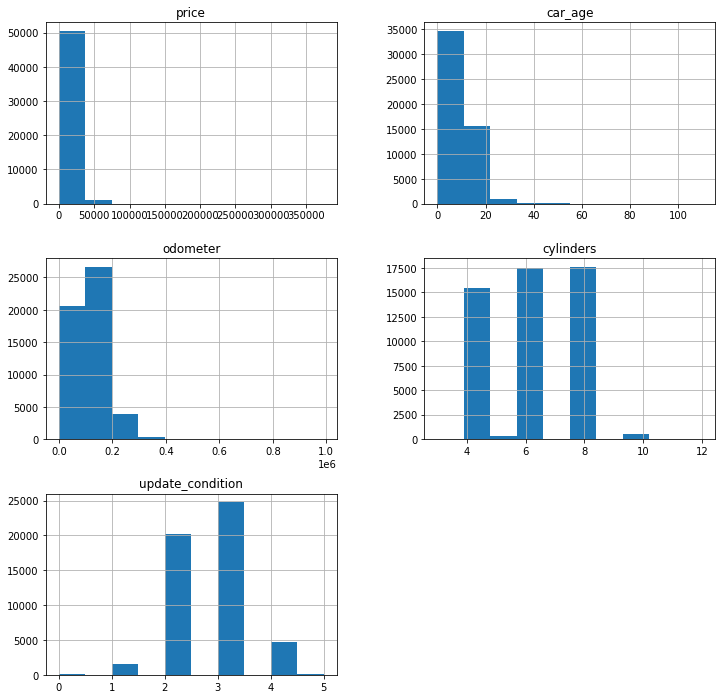

In [30]:
#Initial plotting of indicated parameters.

car.hist(column = ['price', 'car_age','odometer','cylinders','update_condition'], figsize = (12,12))
plt.show()

We have gathered the basic information of all of the parameters. It is hard to see the details with default conditions, so we will adjust the histogram one by one with different conditions. 

In [31]:
car.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,ad_year,car_age,avg_year_mile,update_condition
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,5.152300e+04,51525.000000
mean,12132.464920,2009.786240,6.119893,115215.748947,0.496303,39.55476,2018.307462,8.521223,inf,2.637535
std,10040.803015,6.129553,1.657107,62224.032004,0.499991,28.20427,0.461447,6.143264,NaN,0.712447
min,1.000000,1908.000000,3.000000,0.000000,0.000000,0.00000,2018.000000,0.000000,0.000000e+00,0.000000
25%,5000.000000,2006.000000,4.000000,73036.000000,0.000000,19.00000,2018.000000,4.000000,1.107692e+04,2.000000
50%,9000.000000,2011.000000,6.000000,114671.000000,0.000000,33.00000,2018.000000,7.000000,1.551193e+04,3.000000
75%,16839.000000,2014.000000,8.000000,152381.000000,1.000000,53.00000,2019.000000,12.000000,2.225000e+04,3.000000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.00000,2019.000000,110.000000,inf,5.000000


**price**

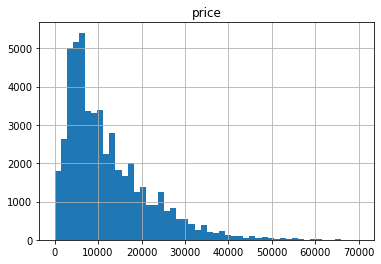

In [32]:
#histogram for 'price'

car['price'].hist(bins = 50, range = (0,70000))
plt.title('price')
plt.show()


After setting conditions, the histogram for price showed a peak at arond 4000-6000, and there is a steady decrease, a few smaller peaks appeared at 18000 and 240000. The tail starts at around 400000. 



**car_age**

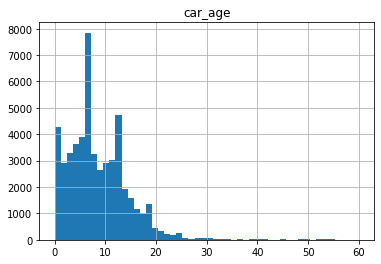

In [33]:
#histogram for car_age

car['car_age'].hist(bins = 50, range = (0,60))
plt.title('car_age')
plt.show()



The histogram for car_age shows a peak at around 0 year (possible a new car), 8 years, and 12 years. The tail starts at around 30 years.

**odometer**

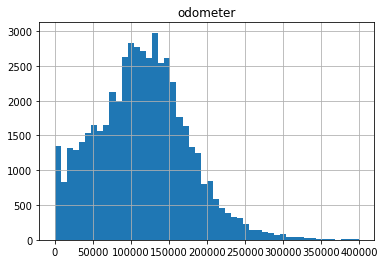

In [34]:
#histogram for 'odometer'

car['odometer'].hist(bins = 50, range = (0,400000))
plt.title('odometer')
plt.show()


The histogram for odometer showed a peak at around 130000 miles. And the tail starts at around 300000 miles.

**cylinders**

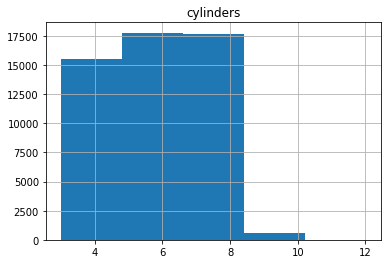

In [35]:
#histogram for the number of cylinders

car['cylinders'].hist(bins = 5)
plt.title('cylinders')
plt.show()




The cylinders looks okay, no obvious outliers.

**update_conditions**

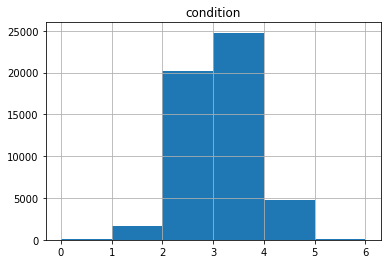

In [36]:
#histogram for the update-conditions

car['update_condition'].hist(bins = 6, range = (0,6))
plt.title('condition')
plt.show()




The update conditions also look fine, no real outliers based on the histogram.

## Study and treat outliers

Given the results above, we have determined that 'price', 'car_age' and 'odometer' likely contain outliers, so we will maunaly check by setting upper and lower limits for those columns.

In [37]:
# upper and lower limit for car price

price_q1 = car['price'].quantile(0.25)
price_q3 = car['price'].quantile(0.75)
price_iqr = price_q3-price_q1
price_lower_limit = price_q1 - 1.5*price_iqr
price_upper_limit = price_q3 + 1.5*price_iqr
print(price_lower_limit)
print(price_upper_limit)


-12758.5
34597.5


In [38]:
#car_age upper and lower limits

age_q1 = car['car_age'].quantile(0.25)
age_q3 = car['car_age'].quantile(0.75)
age_iqr = age_q3 - age_q1
age_lower = age_q1 - age_iqr*1.5
age_upper = age_q3 + age_iqr*1.5

print(age_lower)
print(age_upper)

-8.0
24.0


In [39]:
# odometer upper and lower limits


odo_q1 = car['odometer'].quantile(0.25)
odo_q3 = car['odometer'].quantile(0.75)
odo_iqr = odo_q3 - odo_q1
odo_lower = odo_q1 - odo_iqr*1.5
odo_upper = odo_q3 + odo_iqr*1.5

print(odo_lower)
print(odo_upper)


-45981.5
271398.5


Since we have determined that there are no real outliers in 'update_condition' and 'cylinders'. We will proceed with the above limits. 

In [40]:
# Store data without outliers in a separate DataFrame

#creating slice based on conditions
filtered_car = car.query('price < 35000 & car_age < 24 & odometer < 275000')

#checking new dataframe
filtered_car.info()
filtered_car.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48634 entries, 0 to 51524
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             48634 non-null  int64         
 1   model_year        48634 non-null  float64       
 2   model             48634 non-null  object        
 3   condition         48634 non-null  object        
 4   cylinders         48634 non-null  float64       
 5   fuel              48634 non-null  object        
 6   odometer          48634 non-null  float64       
 7   transmission      48634 non-null  object        
 8   type              48634 non-null  object        
 9   paint_color       39878 non-null  object        
 10  is_4wd            48634 non-null  float64       
 11  date_posted       48634 non-null  datetime64[ns]
 12  days_listed       48634 non-null  int64         
 13  has_4wd           48634 non-null  bool          
 14  ad_day            4863

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,has_4wd,ad_day,ad_month,ad_year,car_age,avg_year_mile,update_condition
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,True,Saturday,June,2018,7.0,20714.285714,2
1,25500,2008.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,True,Friday,October,2018,10.0,8870.500000,2
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,False,Thursday,February,2019,6.0,18333.333333,4
3,1500,2003.0,ford f-150,fair,8.0,gas,188000.0,automatic,pickup,NaN,0.0,2019-03-22,9,False,Friday,March,2019,16.0,11750.000000,1
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,False,Tuesday,April,2019,2.0,40451.500000,3
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,True,Wednesday,June,2018,4.0,14488.500000,3
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,False,Thursday,December,2018,3.0,26404.000000,3
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,True,Monday,January,2019,6.0,18245.500000,3
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,True,Monday,July,2018,6.0,17362.333333,3
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,True,Friday,February,2019,11.0,13381.000000,3


After filtering the three columns with the determined limits, we now have 48634 rows left. 

## Study core parameters without outliers

We will now plot the new columns without outliers. 

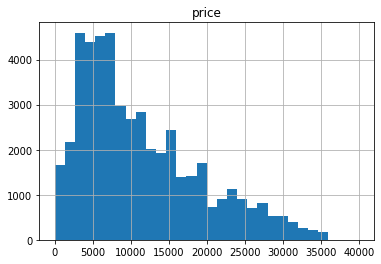

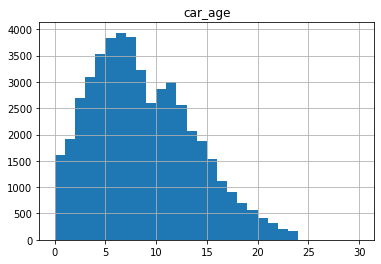

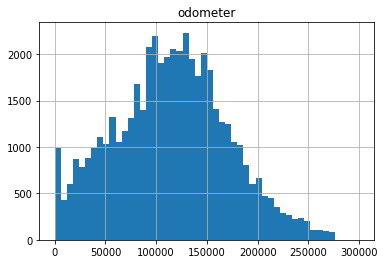

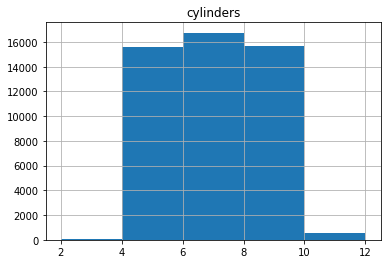

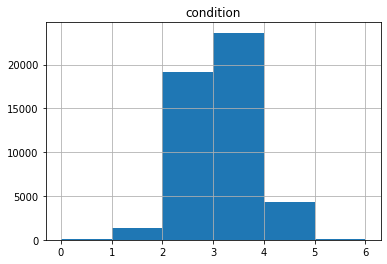

In [41]:
filtered_car['price'].hist(bins = 30, range = (0,40000))
plt.title('price')
plt.show()

filtered_car['car_age'].hist(bins = 30, range = (0,30))
plt.title('car_age')
plt.show()

filtered_car['odometer'].hist(bins = 50, range = (0,300000))
plt.title('odometer')
plt.show()

filtered_car['cylinders'].hist(bins = 5, range = (2, 12))
plt.title('cylinders')
plt.show()

filtered_car['update_condition'].hist(bins = 6, range = (0,6))
plt.title('condition')
plt.show()

The car price still peaks at 4000-6000, while there are various smaller peaks at 12000, 19000, and 23000. 

The car age histogram showed a peak at 6, and a smaller peak at 11. the big peak observed at 7 years in the original is now smaller. 

The new odometer histogram now look more evenly distributed. Peaking at around 900000 and 1350000. 

The main difference between the filtered data and original is that tails are gone, and they look more evenly distributed. 

## Ads lifetime

We will look at **'days_listed'** for more information on how long a typical ad stays on the website.

In [42]:
#general information about this column

filtered_car['days_listed'].describe()

count    48634.000000
mean        39.538142
std         28.197552
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

The mean for days_listed is about 39-40 days, while the median is 33 days. 

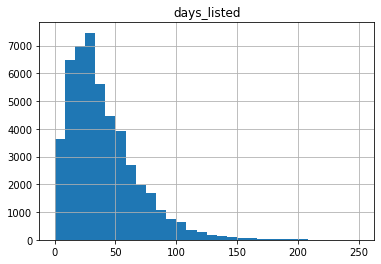

In [43]:
#plotting histogram

filtered_car['days_listed'].hist(bins = 30, range = (0, 250))
plt.title('days_listed')
plt.show()

19.0
53.0
104.0


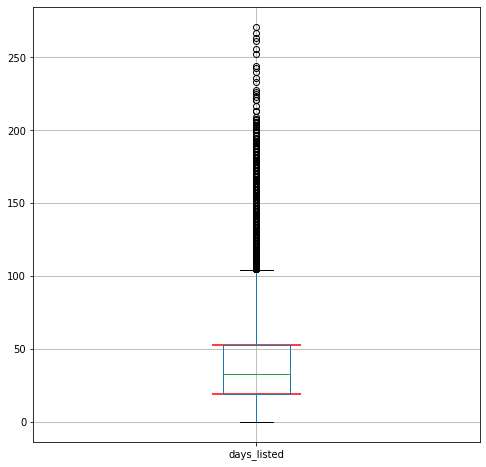

In [44]:
#25% quantile
ad_q1 = filtered_car['days_listed'].quantile(0.25)

#75% quantile
ad_q3 = filtered_car['days_listed'].quantile(0.75)

#interquartile ranges
ad_iqr = ad_q3 - ad_q1

#theoretical value

ad_upper = ad_q3+1.5*ad_iqr

print(ad_q1)
print(ad_q3)
print(ad_upper)

#to check the typical lifetime of an ad

filtered_car.plot(y = 'days_listed', kind = 'box', grid = True, figsize = (8,8))
plt.hlines(y=[ad_q1,ad_q3], xmin = 0.9, xmax=1.1, color = 'red')
plt.show()

Based on the plot and the calculations, a typical ad lasts between 19 and 53 days. Anything that is less than 19 days would be considered as taken down too quickly. While ads that listed longer than 104 days (above the theoretical threshold, calculated by q3 + 1.5 x iqr) would be considered abnormally long.

## Average price per each type of vehicle

Next, we will analyze the number of ads and the average price for each type of vehicle by plotting a graph showing the dependence of the number of ads on the vehicle type. Two types with the greatest number of ads will be selected for the next step.

In [45]:
#making a pivot table for average price based on type

type_price = filtered_car.pivot_table(index = 'type', values = 'price', aggfunc = 'mean')

print(type_price)

                    price
type                     
SUV          10502.186486
bus          18107.428571
convertible  13077.485207
coupe        13599.034774
hatchback     6835.383698
mini-van      8046.564080
offroad      14456.650273
other        10542.137339
pickup       15161.584448
sedan         6971.998920
truck        15248.566307
van          10531.702400
wagon         9002.566225


In [46]:
#the number of ads based on the type of the car

type_ad = filtered_car['type'].value_counts()
print(type_ad)

sedan          12034
SUV            11958
truck          11213
pickup          6353
coupe           2013
wagon           1510
mini-van        1147
hatchback       1006
van              625
convertible      338
other            233
offroad          183
bus               21
Name: type, dtype: int64


In [47]:
#joining two tables

type_price_ad = type_price.join(type_ad)

#renaming columns

type_price_ad.columns = ['price', 'ads']

#sort the table

type_price_ad =type_price_ad.sort_values('ads', ascending = False)

print(type_price_ad)

                    price    ads
type                            
sedan         6971.998920  12034
SUV          10502.186486  11958
truck        15248.566307  11213
pickup       15161.584448   6353
coupe        13599.034774   2013
wagon         9002.566225   1510
mini-van      8046.564080   1147
hatchback     6835.383698   1006
van          10531.702400    625
convertible  13077.485207    338
other        10542.137339    233
offroad      14456.650273    183
bus          18107.428571     21


Based on the combined table, sedan and SUV are the most popular types of vehicle. 

## Price factors

What factors impact the price most? We will analyze sedan and suvs identified as popular type at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), we will plot box-and-whisker charts, and create scatterplots for the rest.

We will start with **sedan**.

In [48]:
#make a slice of sedan only

sedan = filtered_car.query('type == "sedan"')

#keeping the columns of interest

sedan = sedan[['price', 'car_age', 'odometer', 'update_condition', 'transmission','paint_color']]

#reset index

sedan = sedan.reset_index(drop = True)

print(sedan.head(10))

   price  car_age  odometer  update_condition transmission paint_color
0   5500      6.0  110000.0                 4    automatic         red
1  14900      2.0   80903.0                 3    automatic       black
2  14990      4.0   57954.0                 3    automatic       black
3  12990      3.0   79212.0                 3    automatic       white
4   8990      7.0  111142.0                 3    automatic        grey
5  16500      1.0   22104.0                 3    automatic      silver
6  13990      0.0   31932.0                 3    automatic         red
7   3950      9.0  128000.0                 3    automatic         red
8  11499      1.0   39500.0                 4    automatic         NaN
9   8499      4.0   79523.0                 4    automatic         red


For categorical columns, a box plot will be used to check for associations. For numerical columns, a scatterplot will be used. 

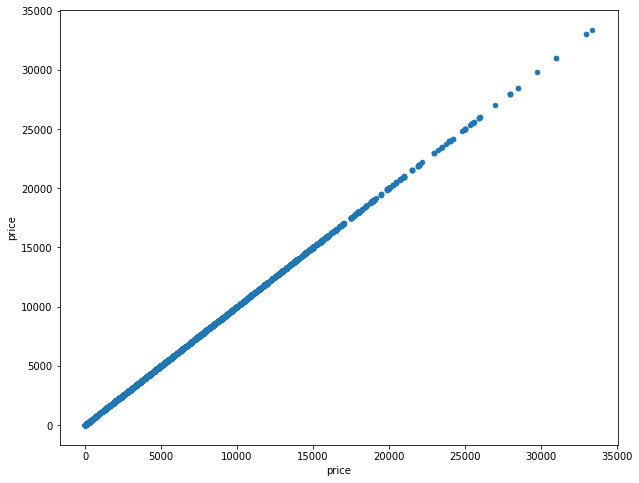

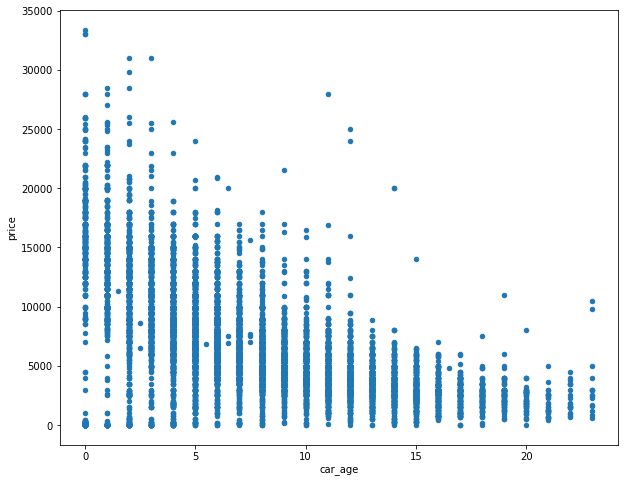

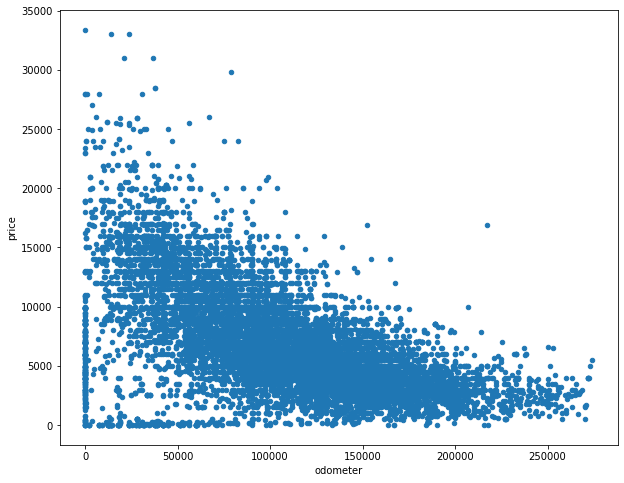

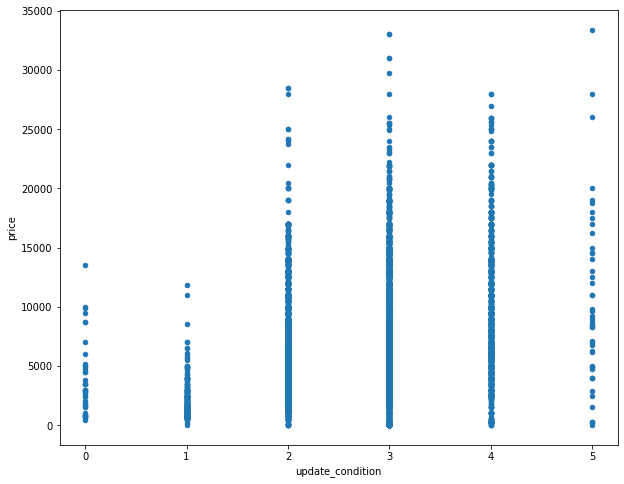

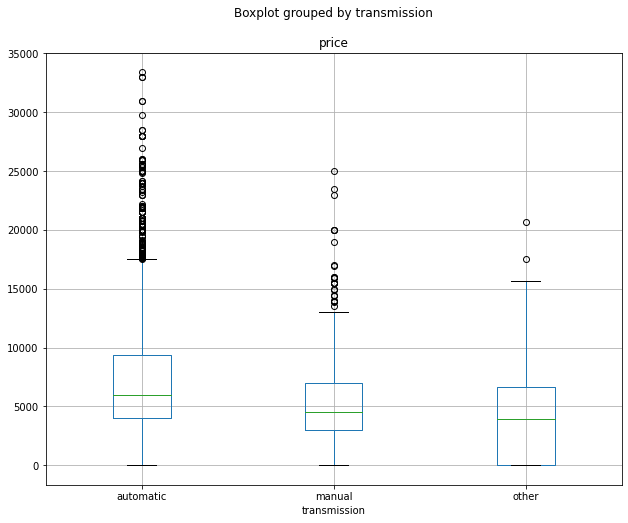

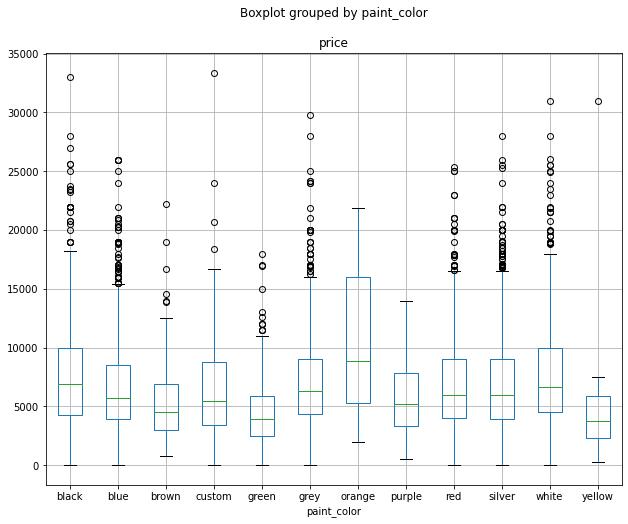

In [49]:
#creating a loop

#looping over columns in sedan
for columns in sedan:
    
    #if the column is transmission or paint color:
    if (columns == 'transmission') | (columns == 'paint_color'):
        
        #create a box plot 
        
        sedan.boxplot(column = 'price', by = columns, figsize = (10,8))
        
        plt.show()
        
    #everything else:    
    else:
        
        #create a scatterplot:
        
        sedan.plot(x = columns, y = 'price', kind = 'scatter', figsize = (10,8))
        plt.show()
        

In [50]:
#correlation matrix

print(sedan.corr())

                     price   car_age  odometer  update_condition
price             1.000000 -0.620150 -0.563393          0.293813
car_age          -0.620150  1.000000  0.627049         -0.319534
odometer         -0.563393  0.627049  1.000000         -0.341125
update_condition  0.293813 -0.319534 -0.341125          1.000000


Based on the correlation matrix and the plots, it appeared that car_age has the strongest association with car price, followed by the odometer readings. For car age, since there is a negative correlation which suggest that as the age decreases the price increases or vice versa. Meaning that newer cars will likely be sold at a higher price than older cars. Same for odometer readings, cars with less miles will be sold at a higher price than cars with more miles. 

conditions does not seem to have a strong impact on car prices at least it cannot be explained by a linear relationship, but it should be taken into consideration with other factors such as car age and odometer. 

According to the box plots, sedan with automatic transimissiong are being sold at a higher average price compared to other types. While orange sedans are being sold at a higher average price compared to other types followed by white, grey and black. This could be due to the fact that less orange cars were sold, and the ones sold were listed for a higher price, therefore affecting the average price. This suspicion is confirmed by checking the total number of ads (below). When there are less than 50 ads, we should not consider this categorical value. Therefore, the colors with the highest average listing price are white, grey, and black. 

In [51]:
print(sedan['paint_color'].value_counts())

silver    2038
black     1759
grey      1615
white     1492
blue      1220
red        936
custom     297
brown      254
green      203
purple      24
yellow      21
orange       9
Name: paint_color, dtype: int64


Next, we will analyze **SUV**

In [52]:
#make a slice of suv only

suv = filtered_car.query('type == "SUV"')

#keeping the columns of interest

suv = suv[['price', 'car_age', 'odometer', 'update_condition', 'transmission','paint_color']]

#reset index

suv = suv.reset_index(drop = True)

print(suv.head(10))

   price  car_age  odometer  update_condition transmission paint_color
0   9400      7.0  145000.0                 2    automatic         NaN
1  15990      6.0  109473.0                 3    automatic       black
2  11500      6.0  104174.0                 3    automatic         NaN
3   9200     11.0  147191.0                 3    automatic        blue
4  12990     10.0  132285.0                 3    automatic       black
5  13990      4.0  100669.0                 3    automatic         red
6  12500      6.0  128325.0                 3    automatic       white
7   6990      8.0  147485.0                 3    automatic      silver
8   5250     11.0  154000.0                 2    automatic         NaN
9   7500     14.0  164620.0                 2    automatic         red


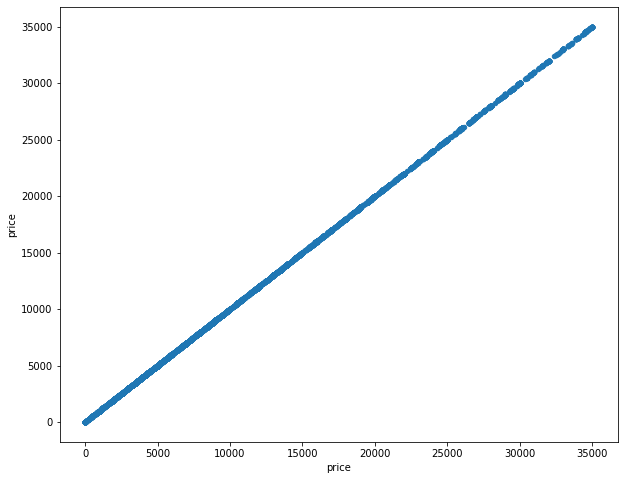

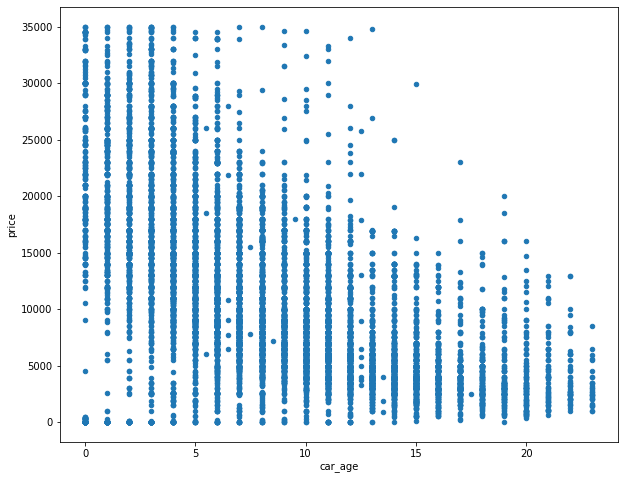

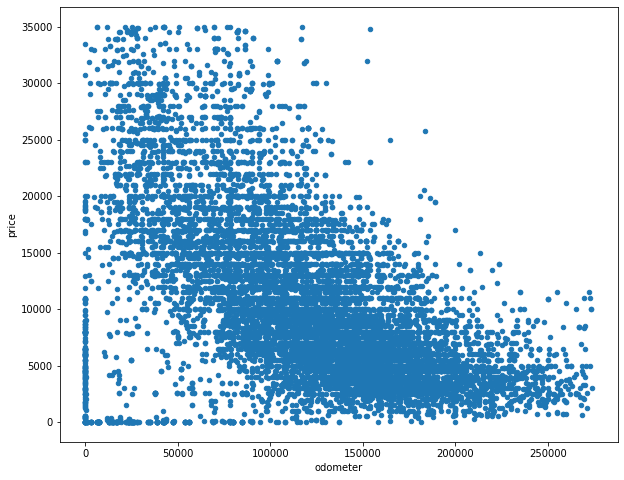

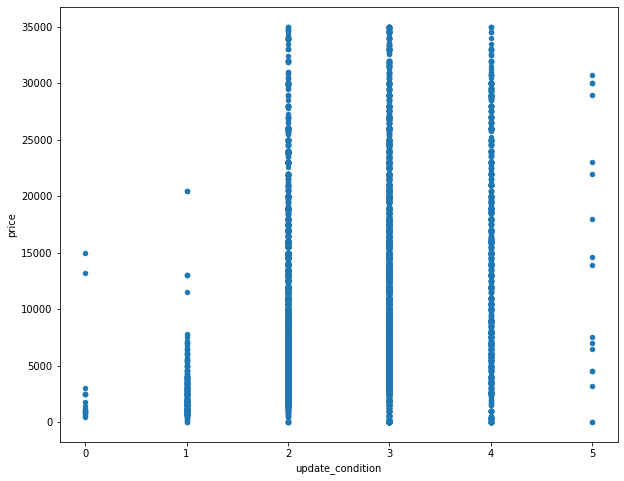

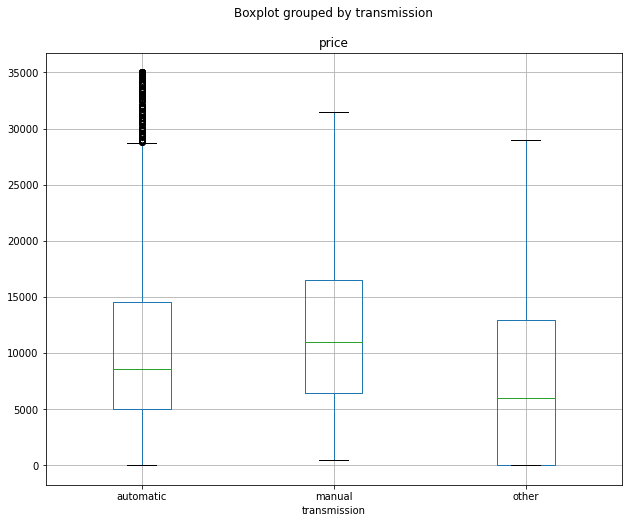

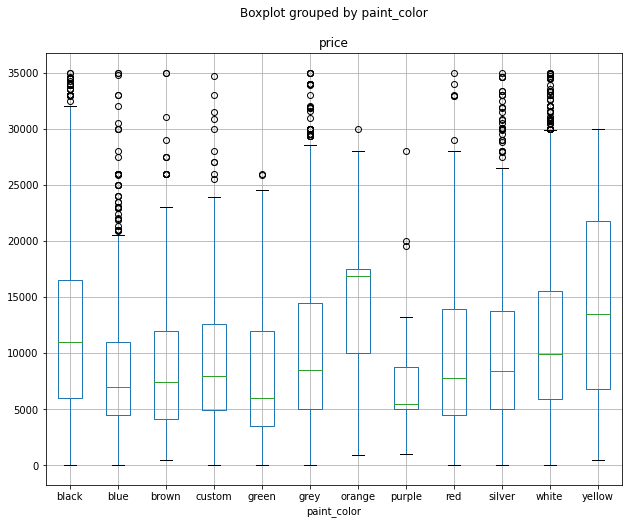

In [53]:
#creating a loop

#looping over columns in suv
for columns in suv:
    
    #if the column is transmission or paint color:
    if (columns == 'transmission') | (columns == 'paint_color'):
        
        #create a box plot 
        
        suv.boxplot(column = 'price', by = columns, figsize = (10,8))
        
        plt.show()
        
    #everything else:    
    else:
        
        #create a scatterplot:
        
        suv.plot(x = columns, y = 'price', kind = 'scatter', figsize = (10,8))
        plt.show()

In [54]:
#correlation matrix

print(suv.corr())


                     price   car_age  odometer  update_condition
price             1.000000 -0.578964 -0.524866          0.261146
car_age          -0.578964  1.000000  0.636572         -0.333274
odometer         -0.524866  0.636572  1.000000         -0.342765
update_condition  0.261146 -0.333274 -0.342765          1.000000


Similar to what we observed in sedans, it appeared that car_age has the strongest association with car price, followed by the odometer readings. For car age, since there is a negative correlation which suggest that as the age decreases the price increases or vice versa. Meaning that newer cars will likely be sold at a higher price than older cars. Same for odometer readings, cars with less miles will be sold at a higher price than cars with more miles. 

conditions does not seem to have a strong impact on car prices at least it cannot be explained by a linear relationship, but it should be taken into consideration with other factors such as car age and odometer. 

According to the box plots, suvs with manual transmission are being sold at a higher average price compared to other types. While orange suvs again are being sold at a higher average price compared to other types followed by yellow, white, grey and black. This could be due to the fact that less orange cars were sold, and the ones sold were listed for a higher price, therefore affecting the average price. By checking the total number of ads (below), although there are a lot less orange suvs listed, the total number of ads is more than 50. Therefore orange suvs tend to have a higher average price than other colors. While yellow cars have less than 50 ads. So we will not count this color among the high-price cars.

In [55]:
print(suv['paint_color'].value_counts())

black     2103
white     1880
silver    1536
grey      1152
blue      1017
red        875
green      422
brown      355
custom     300
orange      81
yellow      45
purple      39
Name: paint_color, dtype: int64


# General conclusion


We have identified several issues with the dataset by checking the general information. All of the issues have been addressed, including replacing the missing values in the columns 'model_year', 'cylinders', 'odometer', 'paint_color', and 'is_4wd' and changing the  data type of 'is_4wd' and 'date_posted' columns.

All missing values were filled accordingly, except for 'paint_color' as we decided that deleting all of the NaN (18%) might impact our data. Datatype have been changed to the appropriate ones.

New columns have been added to clarity and easy accessibility:

Separate columns for days, months, and years. Average mileage per year and the age of the car have been calculated.

Finally, conditions have been assigned with corresponding numbers.

In the following steps, we checked for outliers in 'price', 'car age', 'odometer', 'cylinders' and 'conditions'. 

Based on the histograms, it was determined that  'price', 'car_age' and 'odometer' likely contain outliers. And the presence of outliers were confirmed by checking the upper and lower limits of those columns. After applying filter conditions, we now have 48634 rows left.The main difference between the filtered data and original is that in histograms, the tails are gone, and they look more evenly distributed. 

We then look at the average lifetime for a car ad. Based on the plot and the calculations, a typical ad lasts between 19 and 53 days. Anything that is less than 19 days would be considered as taken down too quickly. While ads that listed longer than 104 days (above the theoretical threshold, calculated by q3 + 1.5 x iqr) would be considered abnormally long.

We also looked at the average price per type of vehicle and the total number of ads per type. We have determined that sedan and SUV are the most popular types of vehicle. We created box plot and scatterplots for each of the vehicle type. From those, we concluded that car age was the factor that impacts price the most, follow by odometer readings. 

For car age, since there is a negative correlation which suggest that as the age decreases the price increases or vice versa. Meaning that newer cars will likely be sold at a higher price than older cars. Same for odometer readings, cars with less miles will be sold at a higher price than cars with more miles. 

conditions does not seem to have a strong impact on car prices at least it cannot be explained by a linear relationship, but it should be taken into consideration with other factors such as car age and odometer. 

According to the box plots, suvs with manual and sedan with automatic transmission are being sold at a higher average price compared to other types. While orange suvs and sedans  are being sold at a higher average price compared to other types followed by white, grey and black. The total number of ads for orange is more than 50 for suv but not sedan. Therefore we conclude that orange suvs tend to have a higher average price than other colors, but the same conclusion cannot be made for sedans. Black, white and grey cars are among the top priced cars for both suvs and sedans. 